# **Beta-Lactamase Data**

Chanin Nantasenamat

[Data Professor YouTube channel](https://youtube.com/dataprofessor)

In [1]:
! wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

--2021-10-08 15:40:00--  https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip [following]
--2021-10-08 15:40:00--  https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416390 (1.4M) [application/zip]
Saving to: ‘beta_lactamase_CHEMBL29.zip’

beta_lactamase_CHEM 100%[===================>]   1.35M  --.-KB/s    in 0.06s   

2021-10-08 15:40:00 (23.6 MB/s) - ‘beta_lacta

In [2]:
! unzip beta_lactamase_CHEMBL29.zip

Archive:  beta_lactamase_CHEMBL29.zip
  inflating: CHEMBL1075063.csv       
  inflating: CHEMBL1075073.csv       
  inflating: CHEMBL1075081.csv       
  inflating: CHEMBL1075159.csv       
  inflating: CHEMBL1075174.csv       
  inflating: CHEMBL1075210.csv       
  inflating: CHEMBL1169593.csv       
  inflating: CHEMBL1250341.csv       
  inflating: CHEMBL1255121.csv       
  inflating: CHEMBL1255122.csv       
  inflating: CHEMBL1255123.csv       
  inflating: CHEMBL1255124.csv       
  inflating: CHEMBL1255130.csv       
  inflating: CHEMBL1255135.csv       
  inflating: CHEMBL1255143.csv       
  inflating: CHEMBL1255144.csv       
  inflating: CHEMBL1255145.csv       
  inflating: CHEMBL1255147.csv       
  inflating: CHEMBL1255155.csv       
  inflating: CHEMBL1287595.csv       
  inflating: CHEMBL1287596.csv       
  inflating: CHEMBL1287597.csv       
  inflating: CHEMBL1287599.csv       
  inflating: CHEMBL1287600.csv       
  inflating: CHEMBL1287601.csv       
  inflating:

In [3]:
! ls *.csv | wc -l

136


In [5]:
import zipfile
import pandas as pd

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( (pd.read_csv( zf.open(f) ) for f in zf.namelist() ) )

In [6]:
df

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
...,...,...,...,...,...,...,...,...,...
13,CHEMBL561555,COC(=O)CC(N)(CC(=O)OC)C(=O)OCc1ccccc1,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
14,CHEMBL561821,NC(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)C(=O)OCc...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
15,CHEMBL561896,COC(=O)CC(CC(=O)OC)(NC(=O)Cc1ccccc1)C(=O)OC,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
16,CHEMBL563044,COC(=O)C(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)NC...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format


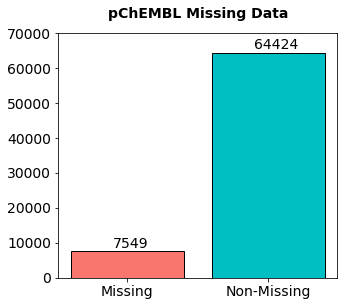

In [7]:
# Bar plot of Missing vs Non-Missing Data

import matplotlib.pyplot as plt

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [8]:
# Non-missing data with pChEMBL value
df2 = df[df.pchembl_value.notnull()]
df2

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format
...,...,...,...,...,...,...,...,...,...
57,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,374.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,assay format
90,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,370.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
91,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,10500.0,nM,IC50,4.98,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
107,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,11000.0,nM,Ki,4.96,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format


In [9]:
df2.groupby('molecule_chembl_id').mean()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,316.200000,6.500000
CHEMBL1024,11220.200000,4.950000
CHEMBL1028,2818.400000,5.550000
CHEMBL1036,39.800000,7.400000
CHEMBL104,27500.000000,4.580000
...,...,...
CHEMBL97643,11220.200000,4.950000
CHEMBL977,631.000000,6.200000
CHEMBL98406,63095.700000,4.200000


In [10]:
df2.groupby('molecule_chembl_id').std()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,NaN,NaN
CHEMBL1024,NaN,NaN
CHEMBL1028,NaN,NaN
CHEMBL1036,NaN,NaN
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,NaN,NaN
CHEMBL977,NaN,NaN
CHEMBL98406,NaN,NaN


In [ ]:
df3 = df2.groupby('molecule_chembl_id').std()
df3[(df3.pchembl_value < 2) & (df3.pchembl_value == pd.NA)]

In [ ]:
import numpy as np

df3 = df2.groupby('molecule_chembl_id').std()
df3[df3.pchembl_value == np.nan]

In [11]:
print('Number of unique ChEMBL ID:', str(len(df.molecule_chembl_id.unique()) )  )
print('Total number of ChEMBL ID: ', str(len(df)) )
print('Number of missing ChEMBL ID: ', str(df.molecule_chembl_id.isnull().sum()) )

Number of unique ChEMBL ID: 64436
Total number of ChEMBL ID:  71973
Number of missing ChEMBL ID:  0


In [12]:
import matplotlib.pyplot as plt

unique = len(df.molecule_chembl_id.unique())
not_unique = len(df) - unique

x = ['Unique', 'Redundant']
y = [unique, not_unique]



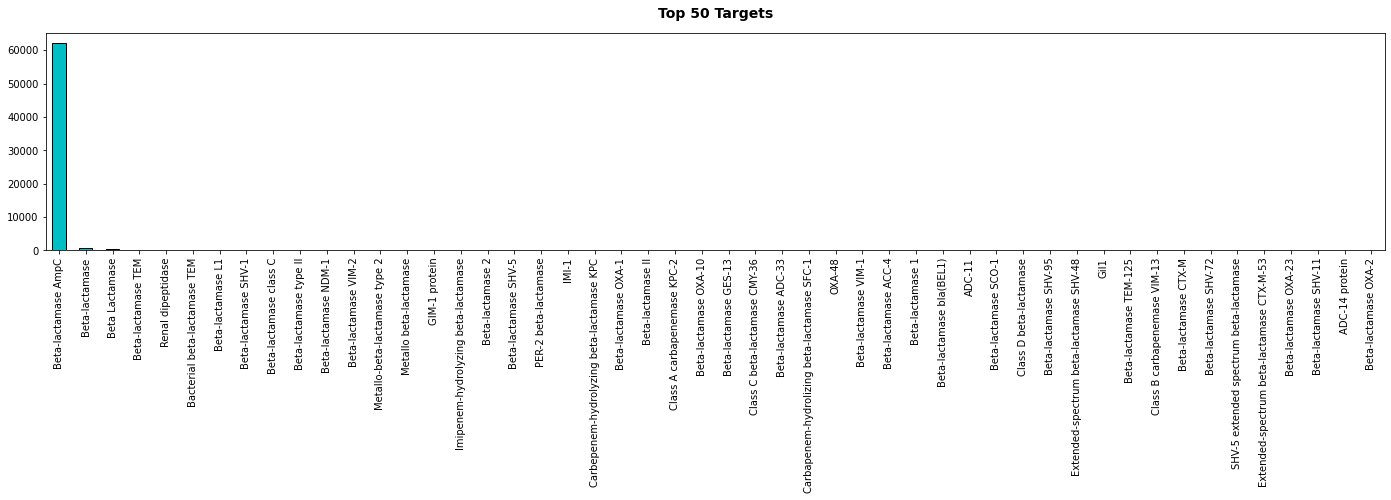

In [13]:
df2.target_pref_name.value_counts()[0:50].plot.bar(figsize=(24,4), color='#00BFC4', ec='black')

plt.title('Top 50 Targets', fontsize=14, fontweight='black', pad=15)
plt.show()

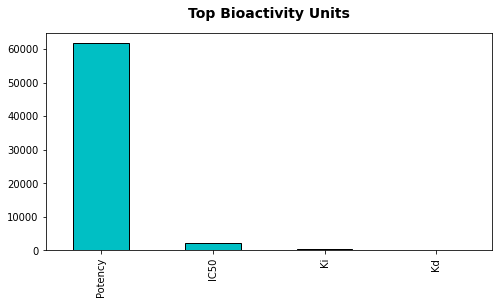

In [14]:
# Top 10 Bioactivity units
df2.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

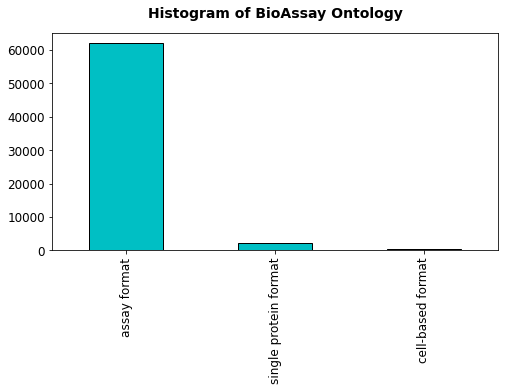

In [15]:
bao_labels = df2.bao_label.value_counts()
bao_labels.plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of BioAssay Ontology', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
bao_labels

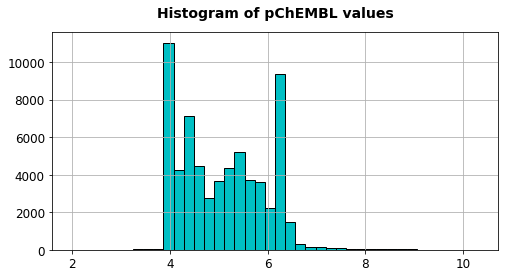

In [16]:
df2.pchembl_value.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pChEMBL values <5 == 'Inactive'
pChEMBL values > 6 == 'Active'
pChEMBL values 5-6 == 'Intermediate'